# Jupyter Notebook  problems in the Essentials of Paleomagnetism Textbook by L. Tauxe

## Problems in Chapter 4

## Problem 1a

Self energy density (or demagnetizing energy density) is given by Equation 4.5  in the text and when multiplied by volume we get:  
$$E_{self} = -{ {1\over 2} } \mu_o N M^2 v. $$  
Given that
$$
\mu_o = 4 \pi \times 10 ^{-7} [H/m]
$$
From the text we know that $N_a+N_b+N_c = 1$ in SI units, so for a sphere where the axes $a, b, c$ are all equal, 
$$
N = {1\over 3}
$$
For magnetite the magnetization is  480 mA/m or
$$
M= 4.8 \times 10^5 [A/m].
$$
and the volume of a sphere is given by
$$
v= {4\over 3} \pi ( {d\over 2} )^3 [m^3]
$$
where $d$ is diameter.   Here's a little python script that does this for us:


In [1]:
import numpy as np # import the fabulous NumPy package
mu0=4*np.pi*1e-7 # permeability of free space in henries per meter
N=1./3.   # demagnetizing factor for  a sphere
M=4.8e5   # magnetization of magnetite in A/m
diameters=[1e-6,10e-6,100e-6]  # list of diameters in meters that are required for the calculation
for d in diameters:
    r=d/2. # calculate radius
    v=(4./3.)* np.pi*r**3  # calculate volume
    E=(-1./2.)*mu0*N*v*M**2 # calculate E_self
    print ('diameter: ','%i'%(d*1e6), 'microns,  self energy: ','%8.2e'%(E),' joules' ) 
    # print diameter in microns, self energy in Joules



diameter:  1 microns,  self energy:  -2.53e-14  joules
diameter:  10 microns,  self energy:  -2.53e-11  joules
diameter:  100 microns,  self energy:  -2.53e-08  joules


## Problem 1b

The demagnetizing factor for `nearly spherical particles' is given in the text as: 
$$
N_a = {1\over 3} [ 1 - {2\over 5}(2 - {b\over a} - {c\over a} )].$ 
$$
For this problem, we can assume that $N_b=N_c$ so we can use the approximation in Equation 4.7 for energy density resulting from shape (multiplied by the volume)  of


$$
E_{ms} =  {1\over 2} \mu_o  N_c M^2 v.
$$

To get $N_c$, use the formula:  

Assuming that $a=4b$ and $b=c$, we get  $N_a$=0.13.  We also know that $N_a+N_b+N_c=1$, hence $N_b=N_c=0.433$.

The volume of a prolate ellipsoid is:  $v= {4\over 3} \pi b^2 a = 2.62 \cross 10^{-19}$m$^3$.   Putting it all together we have:

$$
E_{ms} =   {1\over 2} \times 4 \pi \times 10^{-7} \times 0.433 \times 2.62 \times 10^{-19} \cdot (4.8 \times 10^5)^2$$
$$
= 1.64 x 10^{-14}J.
$$

So, here's a little program to do this: 


In [2]:
a,b,c=1e-6,0.25*1e-6,0.25*1e-6 # semi-axes in microns
Na=(1./3.)*(1.-(2./5.)*(2-b/a-c/a)) # get Na from formula in lecture notes
Nb=(1./2.)*(1.-Na)   # Na+Nb+Nc=1
v=(4./3.)*np.pi*a*b*c # volume of ellipsoid - convert lengths to semi-axes
Ems=(1./2.)*mu0*(Nb)*v*M**2
print ('E_ms = ','%8.2e'%(Ems),' joules')


E_ms =  1.64e-14  joules


## Problem 1c

Wall energy is the wall energy density ($E_w = 2\pi (AK)^{1\over 2}$) times the wall area, $E_w  \pi r^2$ joules  and  self energy is ${ {1\over 2} } \mu_o N M^2 {4\over 3} \pi r^3$.  Taking $N = {1\over 3}$ for a sphere and setting the two to be equal, we have:

$$
E_w \pi r^2 = {2\over 9 }\mu_o M^2\pi r^3
$$

Solving for $r$  we have

$$
r_{crit} =  {9\over 2} {{ E_w}\over {M^2\mu_o} }
$$

Given that $A = 1.3 \times 10^{-11}$J/m , $K=1.3 \times 10^4$J/m$^3$, we get $E_w = 2.6 \times 10^{-3}$ Jm$^{-2}$.  $M=4.8 \times 10^5$ A/m and $\mu_o = 4\pi \times 10^{-7}$.  So,  $r_{crit} \sim$ 40 nm.

 Here's a little script that builds on 1b: 


In [4]:
print ("\n\nAnswer for problem 1c:")
A=1.33e-11 # A in J/m
K=1.35e4 # K1 in J/m^3
Ew=2.*np.pi*np.sqrt(A*K) # wall energy
rcrit=(9./2.) * Ew/(mu0*M**2)  # equation for critical radius
print ('critical radius: ','%i'%(rcrit*1e9),' nm') # print out in nm




Answer for problem 1c:
critical radius:  41  nm


## Problem 2

We know that 
$$\tau = { {1\over C}} \exp {  {Kv}\over {kT} }$$

Rearranging and taking the log of both sides, we get
$$
\hbox{ln }( \tau  C )= { {K {4} \pi r^3}\over {3kT} }.
$$
Solving for $r^3$ gives
$$
r^3 =   {3\over 4} { {kT}\over { K\pi} }ln \tau C.
$$

We  set $k= 1.38 \times 10^{-23}$J/K (Boltzmann's constant), $T=300$K (room temperature),  $C=10^{10}$s, and $K=1.3 \times 10^4$J/m$^3$ (the anisotropy constant for magnetite). Knowing that $d=2r$, we can write the script: 


In [5]:
k=1.38e-23 # Boltzmann's constant
T=300 # room T
C=1e10 # frequency factor
K=1.3e4 # anisotropy constant for magnetite
taus=[.1,10,1e2,1e3,1e5,1e9,1e15]
print (' tau (s)  d (microns)')
for tau in taus:
    r3=((3./4.)*(k*T/(K*np.pi)))*np.log(tau*C) # equation relating r^3 to tau above. 
    r=r3**(1./3.) # take the cube root
    print ('%8.0e'%(tau), '  %5.3f'%(2*r*1e6)) # print tau (seconds) and d (in microns)

 tau (s)  d (microns)
   1e-01   0.023
   1e+01   0.025
   1e+02   0.026
   1e+03   0.026
   1e+05   0.028
   1e+09   0.030
   1e+15   0.033


You were supposed to notice how extremely sensitive $\tau$ is to tiny changes in grain size.  

## Problem 3a

For a highly elongate rod, the magnetization along the long axis ($z$)
results in magnetic surface charge only at the ends of the rod. These ends
account for a very small percent of total surface area. From this simple logic, we
argue that$ N$  along the long axis of the rod  is:  $N_a \simeq 0$.

From the symmetry of the rod, we know that$ N_b = N_c$. (The percent
surface area covered by magnetic charges is the same whether the grain is
magnetized along $b$  or along the $c$.) From the text we know that
$N_a+N_b+N_c=1$.
From this and the observations that $N_a\simeq 0$ and $N_b=N_c$, we can derive:
$ N_a+N_b+N_c=1 = 2N_b.
$
Hence, $N_b={1\over 2}$.  

## Problem 3b

From  the text, we know that the magnetostatic self energy is:
$-{1\over 2} \mu_o \Delta N M^2$, so knowing relationship of $\Delta N$ ($N_a-N_c$) to aspect ratio $AR$ in the file Chapter_4/prolate.txt, we can graph self energy versus aspect ratio: 

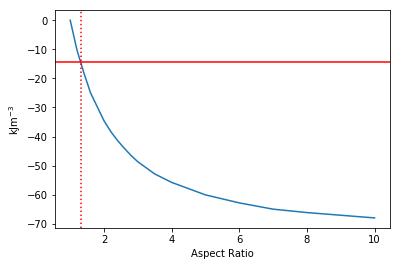

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv('Chapter_4/prolate.txt',sep='\t')
T=300 # room temperature kelvin
K1=1.34e4 #J/m^3 # value for K_1
Ms=4.8e5 # M in A/m
mu_0=np.pi*4*1e-7 #  conversion from H to B
data['deltaN']=data['Nc']-data['Na']
data['E_self']=-0.5*mu_0*data['deltaN']*Ms**2
plt.plot(data['AR'],data['E_self']*1e-3) # convert to kJ/m^3
plt.xlabel('Aspect Ratio')
plt.ylabel('kJm$^{-3}$')
plt.axhline(-14.3,color='red')
plt.axvline(1.33,color='red',linestyle='dotted');

So it looks like the cross-over Aspect Ratio is about 1.33.  

## Problem 3c

From Equation 4.5 in the text, we know that the magnetic field required to overcome  magnetic anisotropy energy barrier is the microscopic coercivity $\mu_o H_k$.  

For shape anisotropy, $\mu_o H_k= \Delta N M$.  Here, the maximum $\Delta N$ is about $1\over 2$, so we have $\mu_o H_k $ = 0.3 T = 300 mT which 
 would be the maximum  microscopic coercivity for magnetite.  